In [23]:
# import neccessary tools 

import pandas as pd
from pathlib import Path
import seaborn as sns
import numpy as np

%matplotlib inline

In [24]:
# 1st data file algo_returns import and calculate null values.

file_algo = Path("Resources/algo_returns.csv")
df_algo = pd.read_csv(file_algo, index_col="Date", parse_dates=True, infer_datetime_format=True)
df_algo.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [25]:
# print out algo_returns with null values.

df_algo.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [26]:
# print out algo_returns without null values.

new_algo = df_algo.dropna()
new_algo = new_algo.rename(columns={"Algo 1":"Algo_1",})
new_algo = new_algo.rename(columns={"Algo 2":"Algo_2"})
new_algo.head()

,Algo_1,Algo_2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [27]:
# 2nd data file I_historical print out of dataframe.

file_historical = Path("Resources/l_historical.csv")
df_historical = pd.read_csv(file_historical, index_col="Date", parse_dates=True, infer_datetime_format=True)
new_historical = df_historical.dropna()
new_historical.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [28]:
# 3rd data file otex_historical print out of data frame.

file_otex = Path("Resources/otex_historical.csv")
df_otex = pd.read_csv(file_otex, index_col="Date", parse_dates=True, infer_datetime_format=True)
new_otex = df_otex.dropna()
new_otex.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [29]:
# 5th data file sp_tsx_history print out of data frame.

file_sp_tsx = Path("Resources/sp_tsx_history.csv")
df_sp_tsx = pd.read_csv(file_sp_tsx, index_col="Date", parse_dates=True, infer_datetime_format=True)
new_sp_tsx = df_sp_tsx.dropna()
new_sp_tsx.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [30]:
# remove dollar sign from sp_tsx_history data frame.

new_sp_tsx["Close"] = new_sp_tsx["Close"].str.replace("$","")
new_sp_tsx["Close"] = new_sp_tsx["Close"].str.replace(",","")
new_sp_tsx["Close"] = new_sp_tsx["Close"].astype("float")
new_sp_returns = new_sp_tsx.pct_change()
new_sp_returns.head()

<ipython-input-30-bd77cd1ed1e8>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  new_sp_tsx["Close"] = new_sp_tsx["Close"].str.replace("$","")


,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [31]:
new_sp_tsx.dtypes

Close    float64
dtype: object

In [32]:
# print out of sp_tsx_history data frame  with Daily_returns as new heading.

new_sp_returns = new_sp_returns.rename(columns={"Close":"Daily_returns"})
new_sp_returns.head()

,Daily_returns
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [33]:
new_sp_returns = new_sp_returns.dropna().copy()
new_sp_returns.head()

,Daily_returns
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [34]:
# 6th data file whale_returns print out of dataframe.

file_whale = Path("Resources/whale_returns.csv")
df_whale = pd.read_csv(file_whale, index_col="Date", parse_dates=True, infer_datetime_format=True)
new_whale = df_whale.dropna()
new_whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [35]:
# Combine data files algo_returns, sp_tsxhistory, and whale_returns.

combined_newfile = pd.concat([new_algo, new_sp_returns, new_whale], axis="columns", join="inner")
combined_newfile.tail()

,Algo_1,Algo_2,Daily_returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2019-04-25,0.000682,-0.007247,-0.000628,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.002981,0.005256,0.002254,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.005208,0.002829,-0.000788,0.001254,0.002719,0.006251,0.005223
2019-04-30,-0.002944,-0.001570,-0.001183,-0.001295,-0.002211,-0.000259,-0.003702
2019-05-01,0.000094,-0.007358,-0.004703,-0.005847,-0.001341,-0.007936,-0.007833


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

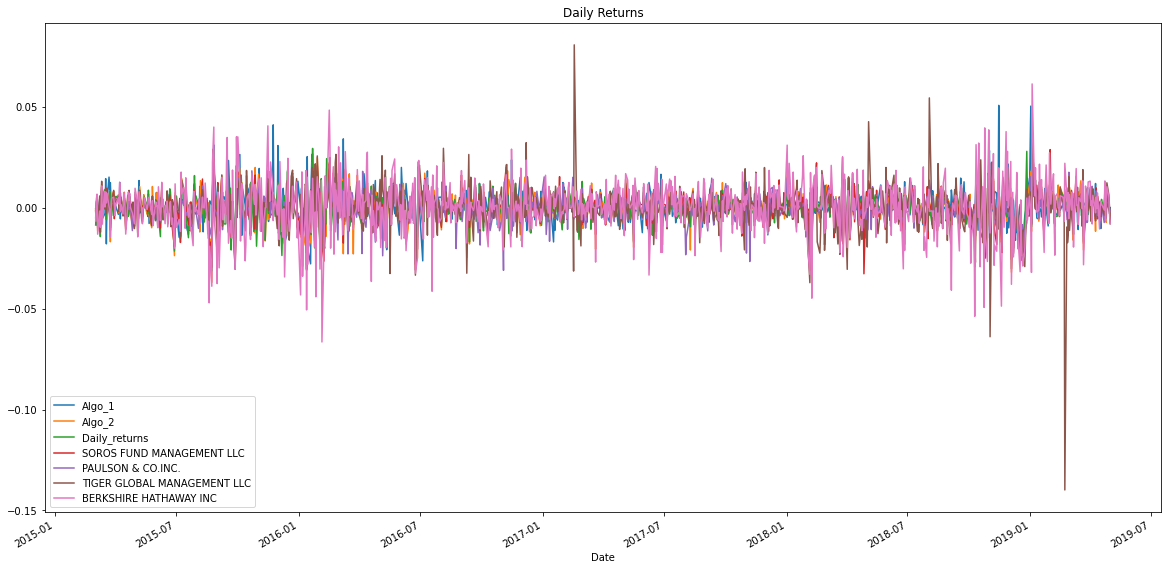

In [36]:
# quantative analysis
combined_newfile.plot(figsize=(20,10), title="Daily Returns")

In [37]:
# performance analysis
cumulative_returns = (1 + combined_newfile).cumprod() - 1
cumulative_returns.head()

,Algo_1,Algo_2,Daily_returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.008530,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.010514,0.001464,-0.011872,0.000962,-0.001755,-0.003028,-0.002383
2015-03-05,-0.011459,0.005794,-0.010544,0.004981,0.002314,-0.000681,0.004327
2015-03-06,-0.016359,-0.005733,-0.020411,-0.002963,-0.001269,-0.009156,-0.008828
2015-03-09,-0.021717,-0.004437,-0.026832,-0.002383,0.002951,-0.003367,-0.010466


<AxesSubplot:xlabel='Date'>

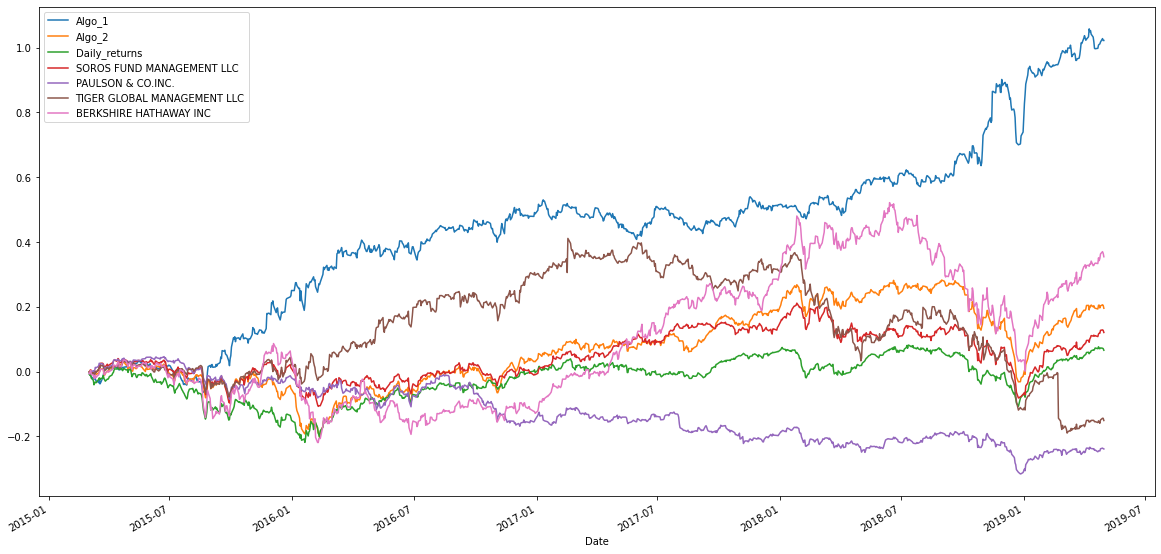

In [38]:
cumulative_returns.plot(figsize=(20,10))


Based on the graph it is showing that Algo_1, Algo_2, Soros Fund Man., and Birkshire Hathaway outperformed the S&P TSX 60

<AxesSubplot:>

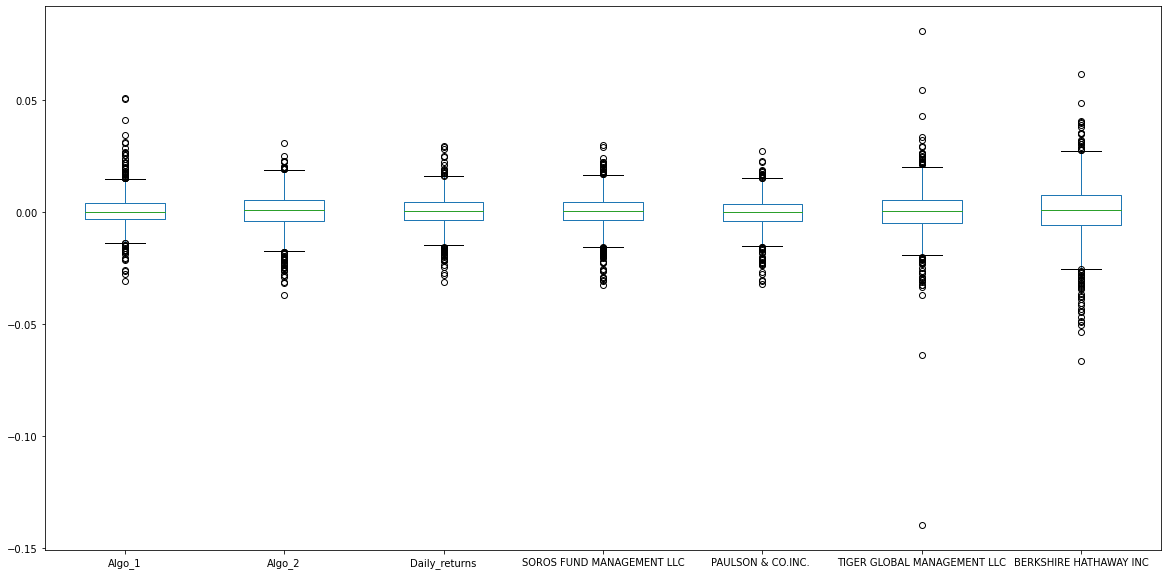

In [39]:
# risk analysis
combined_newfile.plot.box(figsize=(20,10))

In [40]:
        # calculating standard deviation

std_combined_newfile= pd.DataFrame(combined_newfile)
std_combined_newfile= std_combined_newfile .std()
std_combined_newfile

Algo_1                         0.007589
Algo_2                         0.008326
Daily_returns                  0.007034
SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
dtype: float64

In [41]:
        # determine which protfolio is riskier than S&P TSX 60

std_combined_newfile = std_combined_newfile.sort_values(ascending=False)
std_combined_newfile.head()

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo_2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo_1                         0.007589
dtype: float64

According to my calculation it is determined that Berkshire Hathaway Inc is the most risky 

In [42]:
        # calculate the annualized std
    
annualized_std_cf = std_combined_newfile * np.sqrt(252)
annualized_std_cf.head()


BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo_2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo_1                         0.120470
dtype: float64

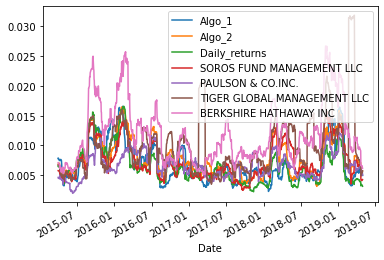

In [43]:
# rolling std 21 day window

combined_newfile_rol = combined_newfile.rolling(window=21).std().plot()

In [44]:
# calculate and plot corelation

combined_newfile = combined_newfile.corr()
combined_newfile


,Algo_1,Algo_2,Daily_returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Algo_1,1.000000,0.285455,0.310276,0.313795,0.266363,0.161236,0.289378
Algo_2,0.285455,1.000000,0.737370,0.826667,0.674015,0.506689,0.684609
Daily_returns,0.310276,0.737370,1.000000,0.673930,0.486511,0.440583,0.557250
SOROS FUND MANAGEMENT LLC,0.313795,0.826667,0.673930,1.000000,0.697076,0.560964,0.750181
PAULSON & CO.INC.,0.266363,0.674015,0.486511,0.697076,1.000000,0.433034,0.540033
TIGER GLOBAL MANAGEMENT LLC,0.161236,0.506689,0.440583,0.560964,0.433034,1.000000,0.423524
BERKSHIRE HATHAWAY INC,0.289378,0.684609,0.557250,0.750181,0.540033,0.423524,1.000000
